|Variable| Definition                                 |Key                                             |
|--------|--------------------------------------------|------------------------------------------------|
|survival| Survival                                   |0 = No, 1 = Yes                                 |
|pclass  | Ticket class                               |1 = 1st, 2 = 2nd, 3 = 3rd                       |
|sex     |Sex                                         |                                                |
|Age     |Age in years                                |                                                |
|sibsp   |# of siblings / spouses aboard the Titanic  |                                                |
|parch   |# of parents / children aboard the Titanic  |                                                |
|ticket  |Ticket number                               |                                                |
|fare    |Passenger fare                              |                                                |
|cabin   |Cabin number                                |                                                |
|embarked|Port of Embarkation                         |C = Cherbourg, Q = Queenstown, S = Southampton  |
**Variable Notes**

**pclass**: A proxy for socio-economic status (SES)
1st = Upper
2nd = Middle
3rd = Lower

**age**: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5

**sibsp**: The dataset defines family relations in this way...

Sibling = brother, sister, stepbrother, stepsister

Spouse = husband, wife (mistresses and fiancés were ignored)

**parch**: The dataset defines family relations in this way...

Parent = mother, father

Child = daughter, son, stepdaughter, stepson

Some children travelled only with a nanny, therefore parch=0 for them.

In [1]:
%matplotlib inline

In [74]:
import pandas as pd
import os

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from pathlib import Path

from titanic_src.features.build_features import get_title

In [3]:
np.random.seed(55)

In [4]:
PROJECT_DIR = str(Path(os.getcwd()).resolve().parents[0])
DATA_DIR = os.path.join('data','raw')

In [5]:
def load_raw_data(data_set):
    csv_path = os.path.join(PROJECT_DIR,DATA_DIR,data_set)
    return pd.read_csv(csv_path,index_col=[0])

In [6]:
train_data = load_raw_data('train.csv')

In [ ]:
train_data

In [7]:
train_data.head(20)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S


* Names have titles - this might contribute to survival rate - we could extract this detail.
* Tickets numbers look mostly nonsensical - maybe just remove them
* Most cabin data is missing - maybe we could simply encode this data as CABIN/NOT CABIN

In [8]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Name        891 non-null object
Sex         891 non-null object
Age         714 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Ticket      891 non-null object
Fare        891 non-null float64
Cabin       204 non-null object
Embarked    889 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


Most data is present. Missing data and possible strategies for dealing with them as follows:

* Age - calculate mean/median age and replace missing data with it.
* Cabin - drop column and replace with cabin assigned attribute/ or extract deck from data
* Embarked - drop missing entries/ replace with most common entry

In [9]:
train_data['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

Most passengers are 3rd class, second most is 1st class and finally least are 2nd class.

In [10]:
train_data['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

Most passengers embarked from S, then C, then Q.

In [11]:
train_data.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fa5dd610940>,
      dtype=object)

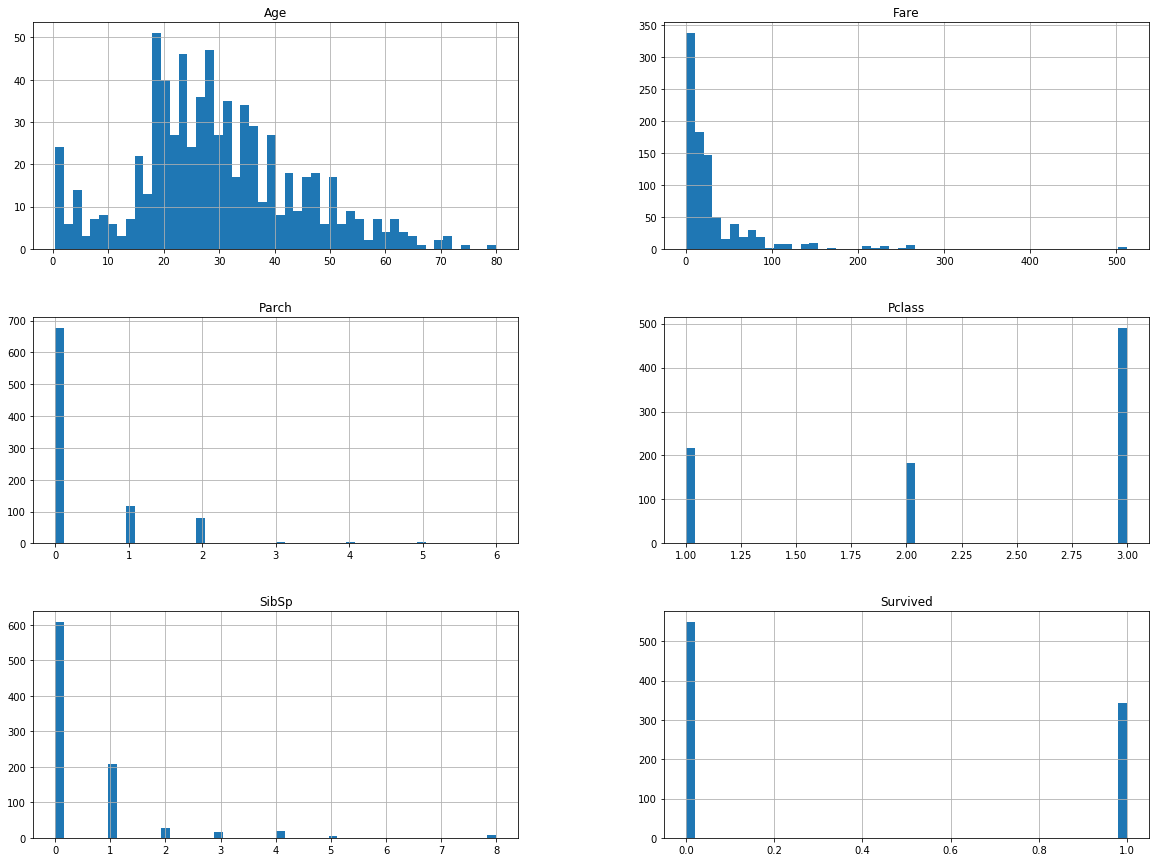

In [12]:
train_data.hist(bins=50,figsize=(20,15))

Fare, Parch and SibSp are quite tail heavy - maybe transform using logs. Age is also tail heavy but much less so.

The largest proportion of people don't have siblings or parents.

Most people had low (or free) fares, but there are a few very large fares.

Lets see what a quantile transformer does to the data:

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fa5d9d937f0>,
      dtype=object)

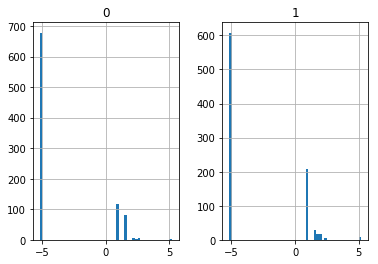

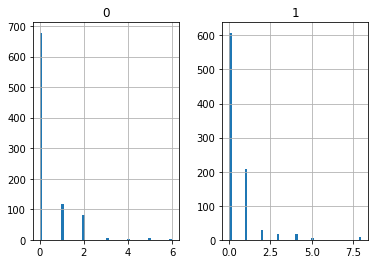

In [13]:
from sklearn.preprocessing import QuantileTransformer

qt = QuantileTransformer(output_distribution='normal')
new_age = qt.fit_transform(train_data[['Parch','SibSp']])
new_age_df = pd.DataFrame(new_age)
new_age_df.hist(bins=50)
rev_age = qt.inverse_transform(new_age)
rev_age_df = pd.DataFrame(rev_age)
rev_age_df.hist(bins=50)

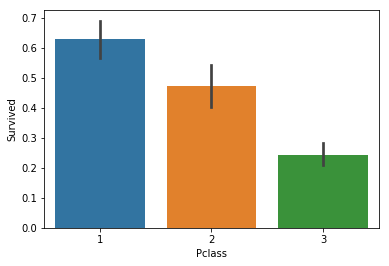

In [14]:
sns.barplot(x="Pclass", y="Survived", data=train_data)

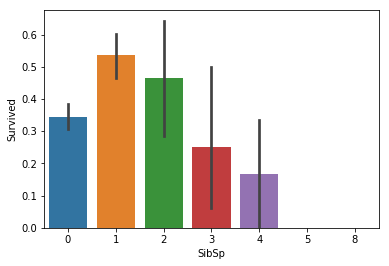

In [15]:
sns.barplot(x="SibSp", y="Survived", data=train_data)

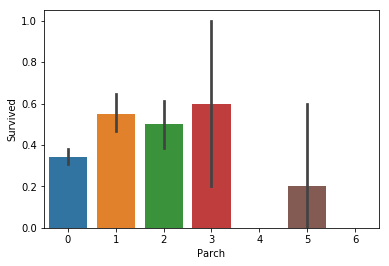

In [16]:
sns.barplot(x="Parch", y="Survived", data=train_data)

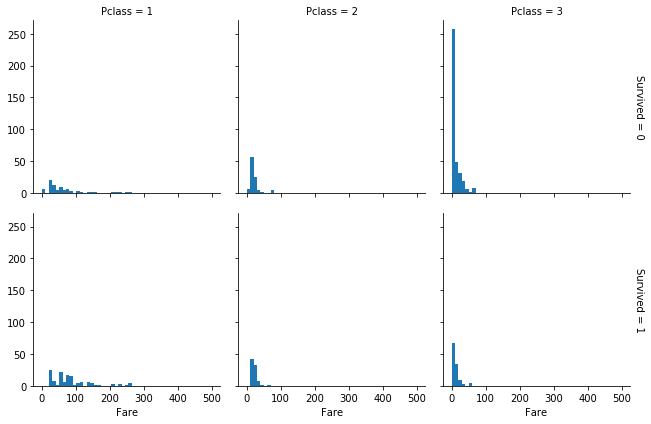

In [17]:
g = sns.FacetGrid(train_data, row="Survived", col="Pclass", margin_titles=True)
bins = np.linspace(0, 500, 50)
g.map(plt.hist, "Fare", bins=bins)

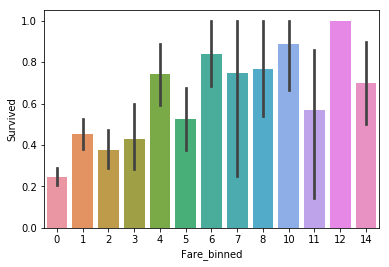

In [18]:
train_data['Fare_binned'] = pd.cut(train_data['Fare'].where(train_data['Fare'] <200,200), bins=15,labels=False)
sns.barplot(x="Fare_binned", y="Survived", data=train_data)
train_data.drop('Fare_binned',axis=1,inplace=True)

There seems to be a relationship between higher fares and higher survivability - at least up to a point. 

Feature extraction, engineering and scaling

* Survived
This is the target

* Pclass
Should be transformed using categorical encoder - original dropped

* Name
Extract title from name and drop the name column

* Sex
Categorical Encoded

* Age
Missing values Age should be imputed based on Pclass and Sex

* SibSp
* Parch
Based on these two features we can construct "family size" and "is alone" features

* Ticket
Drop or split in some interesting manner

* Fare
Leave as is since there are no missing values 

* Cabin
Extract the alpha character related to cabin and make unspecified category - categorical encode data - drop original

* Embarked
Categorical encoded - original dropped


In [27]:
lower

7.9104

In [70]:
train_data["AgeBucket"] = train_data["Age"] // 15*15
train_data[["AgeBucket", "Survived"]].groupby(['AgeBucket']).mean()



,Survived
AgeBucket,
0.0,0.576923
15.0,0.362745
30.0,0.423256
45.0,0.404494
60.0,0.240000
75.0,1.000000


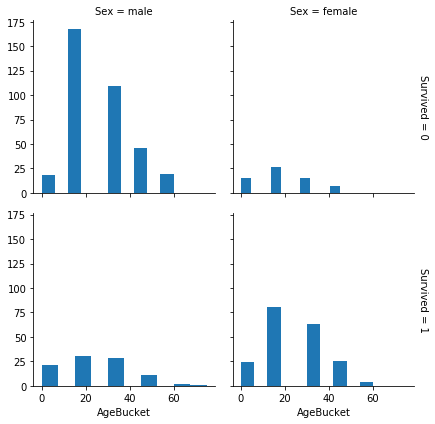

In [71]:
g = sns.FacetGrid(train_data, row="Survived", col="Sex", margin_titles=True)
# bins = np.linspace(0, 500, 50)
g.map(plt.hist, "AgeBucket")

In [84]:
train_data['Title'] = train_data['Name'].apply(get_title)

replacements = {'Mlle':'Miss.',
                'Sir':'Royal',
                'Dr':'Officer',
                'Rev':'Officer',
                'Col':'Officer',
                'Major':'Officer',
                'Mme':'Mrs.',
                'Ms.':'Miss.',
                'Countess':'Royal',
                'Don':'Royal',
                'Jonkheer':'Master',
                'Lady':'Royal',
                'Capt':'Officer'}

def replace_title(title):
    replacements = {'Mlle':'Miss.',
                    'Sir':'Royal',
                    'Dr':'Officer',
                    'Rev':'Officer',
                    'Col':'Officer',
                    'Major':'Officer',
                    'Mme':'Mrs.',
                    'Ms.':'Miss.',
                    'Countess':'Royal',
                    'Don':'Royal',
                    'Jonkheer':'Master',
                    'Lady':'Royal',
                    'Capt':'Officer'}
    if title in replacements:
        return replacements[title]
    else:
        return title

In [88]:
train_data['Family'].value_counts()


347082               7
CA. 2343             7
1601                 7
CA 2144              6
3101295              6
347088               6
S.O.C. 14879         5
382652               5
347077               4
2666                 4
113760               4
LINE                 4
17421                4
19950                4
4133                 4
113781               4
W./C. 6608           4
349909               4
PC 17757             4
239853               3
13502                3
F.C.C. 13529         3
SC/Paris 2123        3
347742               3
371110               3
110413               3
24160                3
PC 17572             3
110152               3
PC 17760             3
                    ..
28228                1
SO/C 14885           1
113501               1
350034               1
12460                1
29751                1
31028                1
347071               1
A/4. 20589           1
SOTON/O.Q. 392087    1
PC 17597             1
2689                 1
349204     